In [1]:
import numpy as np
from sklearn import preprocessing
import re
import os
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
numb_feat='387'
exp_name='int_E_T_0_och_3'
feat_type='fbp'
enert= np.load('../../data_features/och_data/internal_energy_T_0_OCH.npy')
G= np.load('../../data_features/och_data/fbp_387_2b__2_3_3b_3_OCH.npy')
numb_atoms= np.load('../../data_features/och_data/number_of_atoms_per_structure_OCH.npy')
enert= enert[:10000]
G= G[:10000]
numb_atoms= numb_atoms[:10000]
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape
np.save('g_scaled_%s_%s_%s'%(feat_type,numb_feat,exp_name), g_st)

*********************
g_st  (10000, 387)
enert  (10000,)


In [3]:
#G_scaled= g_st[:20000,:]
#E=np.reshape(enert[:20000],(len(enert[:20000]),1))
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))
print E.shape
print G_scaled.shape

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.75) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]
print 'G_train_scaled->', G_train_scaled.shape
print 'G_vali_scaled->', G_vali_scaled.shape
print 'E_train->', E_train.shape
print 'E_vali->', E_vali.shape
np.save('E_targ_%s_%s_%s'%(feat_type,numb_feat,exp_name), E)
np.save('trai_id_%s_%s_%s'%(feat_type,numb_feat,exp_name), trai_id)
np.save('vali_id_%s_%s_%s'%(feat_type,numb_feat,exp_name), vali_id)

(10000, 1)
(10000, 387)
G_train_scaled-> (7500, 387)
G_vali_scaled-> (2500, 387)
E_train-> (7500, 1)
E_vali-> (2500, 1)


In [4]:
#exp_name='int_E_T_298_och_1'
#params = {'n_estimators': 600, 'max_depth': 6, 'min_samples_split': 3,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':3} #val MSE: 6.8630 MAE 0.5247
#tra MSE: 0.0009 MAE 0.0218
#fbp_387_2b__2_3_3b_3_OCH
#val MSE: 7.4882 MAE 1.4698
#tra MSE: 0.1516 MAE 0.2852
#fbp_702_2b__2_3_4_3b_2_3_OCH
#val MSE: 15.0174497 MAE 1.42447
#tra MSE: 0.0060620 MAE 0.05697
#exp_name='int_E_T_298_och_2'
params = {'n_estimators': 750, 'max_depth': 6, 'min_samples_split': 5,
          'learning_rate': 0.2590, 'loss': 'ls', 'min_samples_leaf':5} #val MSE: 4.8732052 MAE 0.50206
#tra MSE: 0.0043070 MAE 0.04041
#exp_name='int_E_T_298_och_3'
#params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':2} #val MSE: 13.4857 MAE 1.7971val MSE: 7.1331 MAE 0.6846
#tra MSE: 0.2528 MAE 0.3685 tra MSE: 0.0193 MAE 0.0971

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(G_train_scaled, E_train)
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
mae= mean_absolute_error(E_vali, clf.predict(G_vali_scaled))
print("val MSE: %.4f MAE %.4f" % (mse,mae))
mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
mae= mean_absolute_error(E_train, clf.predict(G_train_scaled))
print("tra MSE: %.4f MAE %.4f" % (mse,mae))

/home/accounts/zeledon/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


val MSE: 21.1074 MAE 1.7657
tra MSE: 0.0000 MAE 0.0031


In [9]:
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
mae= mean_absolute_error(E_vali, clf.predict(G_vali_scaled))
print("val MSE: %.7f MAE %.5f" % (mse,mae))
mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
mae= mean_absolute_error(E_train, clf.predict(G_train_scaled))
print("tra MSE: %.7f MAE %.5f" % (mse,mae))

val MSE: 18.8382172 MAE 1.74994
tra MSE: 0.0000061 MAE 0.00172


In [5]:
np.save('E_pred_%s_%s_%s'%(feat_type,numb_feat,exp_name), clf.predict(g_st))

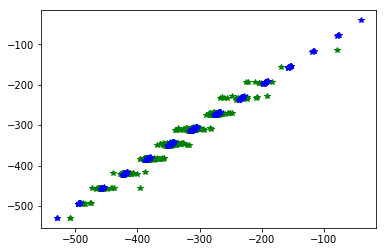

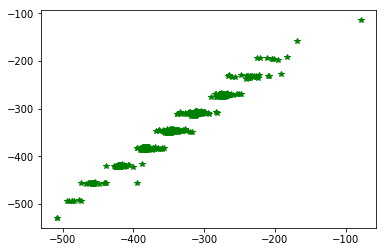

MSE: 0.0000


In [10]:
Ebr_vali= clf.predict(G_vali_scaled)

Ebr_train= clf.predict(G_train_scaled)

plt.plot(Ebr_vali, np.squeeze(E_vali), '*g', Ebr_train, Ebr_train, '*b')
plt.show()

plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')#, Ebr_vali, Ebr_vali, '*b')
plt.show()

mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
print("MSE: %.4f" % mse)

1.33247981823
1.07495264268e-05
0.134044541276


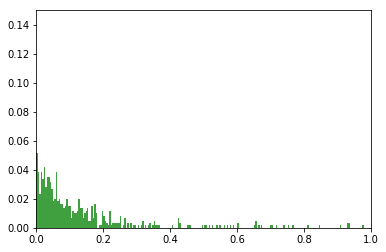

In [8]:
diff_vali= np.abs(np.subtract(Ebr_vali, np.squeeze(E_vali)))
print np.max(diff_vali)
print np.min(diff_vali)
diff_vali_aver= np.average(diff_vali)
print diff_vali_aver

n, bins, patches = plt.hist(diff_vali, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 1.0, 0, 0.15])
for item in patches:
    item.set_height(item.get_height()/sum(n))
plt.show()

In [8]:
print E_vali.shape
E_vali1d= np.squeeze(E_vali)

(240, 1)


In [9]:
E_b= clf.predict(G_vali_scaled)
print E_b.shape

(240,)


In [10]:
print np.average(np.abs(np.subtract(E_vali1d, E_b)))

0.020570270253


In [65]:
np.save('../analysis/diff_vali_grad_bost_X_oni_48', diff_vali)

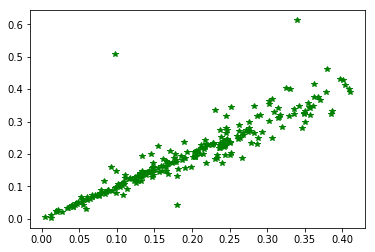

In [12]:
plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')
plt.show()

In [12]:
np.save('g_vali_scaled', G_vali_scaled)
np.save('E_vali', E_vali)
np.save('g_trai_scaled', G_train_scaled)
np.save('E_trai', E_train)
np.save('E_vali_pred', clf.predict(G_vali_scaled))

In [13]:
np.save('E_vali_pred', clf.predict(G_vali_scaled))